In [7]:
pip install scipy

   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   ---------------------------------------- 0.5/44.5 MB 4.2 MB/s eta 0:00:11
   - -------------------------------------- 1.8/44.5 MB 5.6 MB/s eta 0:00:08
   -- ------------------------------------- 3.1/44.5 MB 6.0 MB/s eta 0:00:07
   ---- ----------------------------------- 5.0/44.5 MB 6.6 MB/s eta 0:00:07
   ------ --------------------------------- 7.1/44.5 MB 7.3 MB/s eta 0:00:06
   -------- ------------------------------- 9.4/44.5 MB 7.9 MB/s eta 0:00:05
   ---------- ----------------------------- 11.5/44.5 MB 8.2 MB/s eta 0:00:05
   ------------ --------------------------- 13.4/44.5 MB 8.4 MB/s eta 0:00:04
   ------------- -------------------------- 15.5/44.5 MB 8.5 MB/s eta 0:00:04
   ---------------- ----------------------- 17.8/44.5 MB 8.8 MB/s eta 0:00:04
   ------------------ --------------------- 20.2/44.5 MB 9.0 MB/s eta 0:00:03
   -------------------- ------------------- 22.5/44.5 MB 9.2 MB/s eta 0:00:03



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd


In [5]:
#load data
train_rd = pd.read_csv(r"D:/Thu thập & tiền xử lý dữ liệu/Đề Classroom/Train/train.csv")
train_rd.dtypes
train_rd.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
import scipy
fare_iqr = scipy.stats.iqr(train_rd['Fare'])
print(fare_iqr)

23.0896


In [9]:
# su dung cong thuc
Q1= np.quantile(train_rd['Fare'].dropna(),0.25)
print(Q1)

7.9104


In [10]:
# su dung cong thuc
Q3= np.quantile(train_rd['Fare'].dropna(),0.75)
print(Q3)

31.0


In [11]:
#khoang cach tu phan vi
IQR = Q3-Q1
print(IQR)

23.0896


In [12]:
#Cach1: Khoang cach bien thien
Range = train_rd['Fare'].max()- train_rd['Fare'].min()
print(Range)

512.3292


In [13]:
#Cach2 : Khoang cach bien bien
Range = np.ptp(train_rd['Fare'])
print(Range)

512.3292


In [14]:
#Tinh phuong sai
ps = train_rd['Fare'].var()
print(ps)

2469.436845743116


In [15]:
#Tinh do lech chuan
dlc = train_rd['Fare'].std()
print(dlc)

49.6934285971809


In [ ]:
# Do lech
do_lech = train_rd['Fare'].skew()
print(do_lech)
#=> 0 : Phan phoi lech phai

4.787316519674893


In [18]:
#Do nhon
do_nhon = train_rd['Fare'].kurtosis()
print(do_nhon)
#=>>0: Phan phoi nhon hon phan phoi chuan
from matplotlib import pyplot

33.39814088089868


<function matplotlib.pyplot.show(close=None, block=None)>

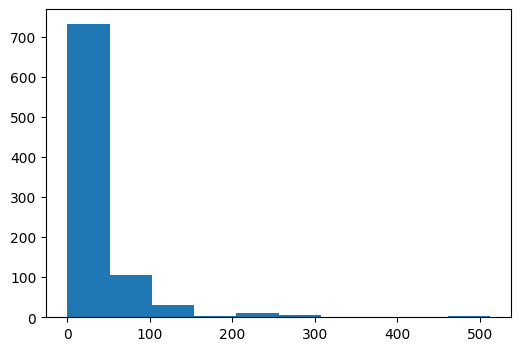

In [19]:
#Truc quan

#ve historgram cua bien fare
pyplot.figure(figsize=(6,4))
pyplot.hist(train_rd['Fare'])
pyplot.show

<function matplotlib.pyplot.show(close=None, block=None)>

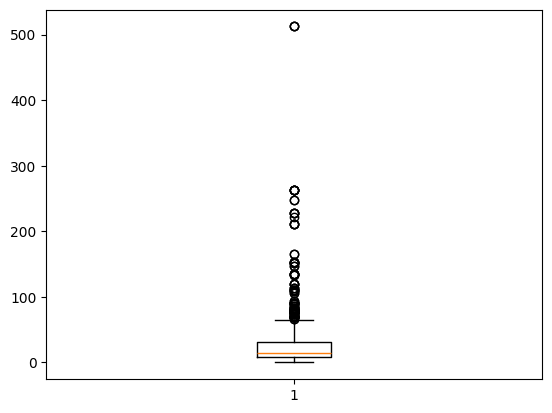

In [20]:
#ve boxplot cua bien Fare
pyplot.Figure(figsize=(6,4))
pyplot.boxplot(train_rd['Fare'])
pyplot.show

In [21]:
#in cac gia tri ngoai lai
print(train_rd['Fare']>Q3+1.5*IQR)

0      False
1       True
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Fare, Length: 891, dtype: bool


In [22]:
#Tinh so luong lop ve
value_counts = train_rd['Pclass'].value_counts()
print(value_counts)

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


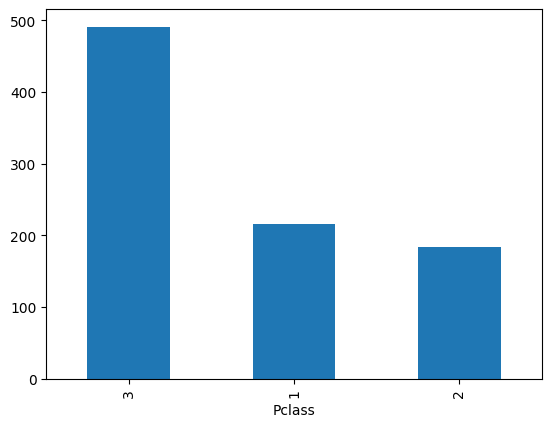

In [23]:
#ve bieu do cot minh hoa
#sns.set()
value_counts.plot.bar()
pyplot.show()

In [24]:
#so luong hanh khach trong lop ve
classes = (train_rd.groupby('Pclass').count())['PassengerId']
print(classes)

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64


In [ ]:
def Stem_and_leaf(data):
    #Sap xep du lieu
    data.sort()

In [26]:
#Khoi tao de luu tru stem and leaf
stem_dict = {}

In [35]:
for num in classes:
    # Tách stem và leaf
        stem, leaf = divmod(num, 10)
        
        # Gộp các lá tương ứng với một thân
        stem_dict.setdefault(stem, []).append(leaf)


In [31]:
# Hiển thị stem-and-leaf plot
print("Stem | Leaf")
print("-------------")

Stem | Leaf
-------------


In [32]:
for stem, leaves in sorted(stem_dict.items()):
    leaf_str = " ".join(map(str, leaves))
    print(f"{stem:<4} | {leaf_str}")

18   | 4
21   | 6
49   | 1


In [33]:
#data mau
data = [12,10,15,19,14,18,23, 25, 29, 30, 32, 32, 33, 33, 35, 37, 40, 45, 45, 46, 48]